# **Importing Libraries**

In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import shutil

# **Downloading & Exploring Dataset**

* Dataset Link:  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

In [2]:
URL = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

In [3]:
zip_file = tf.keras.utils.get_file(fname='flower_photos.tgz',
                                   origin=URL,
                                   extract=True)

228827136/228813984 [==============================] - 3s 0us/step


In [4]:
zip_file

'/root/.keras/datasets/flower_photos.tgz'

In [5]:
os.path.dirname(zip_file)

'/root/.keras/datasets'

In [6]:
base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')
base_dir

'/root/.keras/datasets/flower_photos'

In [7]:
!ls -al /root/.keras/datasets/

total 223468
drwxr-xr-x 3 root   root      4096 Sep  8 08:23 .
drwxr-xr-x 3 root   root      4096 Sep  8 08:23 ..
drwxr-x--- 7 270850 5000      4096 Feb 10  2016 flower_photos
-rw-r--r-- 1 root   root 228813984 Sep  8 08:23 flower_photos.tgz


In [8]:
!ls -al /root/.keras/datasets/flower_photos

total 624
drwxr-x--- 7 270850 5000   4096 Feb 10  2016 .
drwxr-xr-x 3 root   root   4096 Sep  8 08:23 ..
drwx------ 2 270850 5000  36864 Feb 10  2016 daisy
drwx------ 2 270850 5000  53248 Feb 10  2016 dandelion
-rw-r----- 1 270850 5000 418049 Feb  9  2016 LICENSE.txt
drwx------ 2 270850 5000  36864 Feb 10  2016 roses
drwx------ 2 270850 5000  36864 Feb 10  2016 sunflowers
drwx------ 2 270850 5000  45056 Feb 10  2016 tulips


# **Creating Training and Validation Data**

In [9]:
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [10]:
for dir_path, dir_name, file_name in os.walk(base_dir):
  print(dir_path, len(dir_name), len(file_name))

/root/.keras/datasets/flower_photos 5 1
/root/.keras/datasets/flower_photos/dandelion 0 898
/root/.keras/datasets/flower_photos/daisy 0 633
/root/.keras/datasets/flower_photos/sunflowers 0 699
/root/.keras/datasets/flower_photos/roses 0 641
/root/.keras/datasets/flower_photos/tulips 0 799


In [11]:
for class_name in class_names:
  image_path = os.path.join(base_dir, class_name)
  # print(image_path)
  images = glob.glob(image_path + '/*.jpg')
  print(class_name, len(images))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]
  print(len(train), len(val))

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', class_name)):
      os.makedirs(os.path.join(base_dir, 'train', class_name))
    shutil.move(t, os.path.join(base_dir, 'train', class_name))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'validation', class_name)):
      os.makedirs(os.path.join(base_dir, 'validation', class_name))
    shutil.move(v, os.path.join(base_dir, 'validation', class_name))


daisy 633
506 127
dandelion 898
718 180
roses 641
513 128
sunflowers 699
559 140
tulips 799
639 160


In [12]:
for dir_path, dir_name, file_name in os.walk(base_dir):
  print(dir_path, len(dir_name), len(file_name))

/root/.keras/datasets/flower_photos 7 1
/root/.keras/datasets/flower_photos/dandelion 0 0
/root/.keras/datasets/flower_photos/daisy 0 0
/root/.keras/datasets/flower_photos/sunflowers 0 0
/root/.keras/datasets/flower_photos/train 5 0
/root/.keras/datasets/flower_photos/train/dandelion 0 718
/root/.keras/datasets/flower_photos/train/daisy 0 506
/root/.keras/datasets/flower_photos/train/sunflowers 0 559
/root/.keras/datasets/flower_photos/train/roses 0 513
/root/.keras/datasets/flower_photos/train/tulips 0 639
/root/.keras/datasets/flower_photos/validation 5 0
/root/.keras/datasets/flower_photos/validation/dandelion 0 180
/root/.keras/datasets/flower_photos/validation/daisy 0 127
/root/.keras/datasets/flower_photos/validation/sunflowers 0 140
/root/.keras/datasets/flower_photos/validation/roses 0 128
/root/.keras/datasets/flower_photos/validation/tulips 0 160
/root/.keras/datasets/flower_photos/roses 0 0
/root/.keras/datasets/flower_photos/tulips 0 0


In [13]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

train_dir, val_dir

('/root/.keras/datasets/flower_photos/train',
 '/root/.keras/datasets/flower_photos/validation')

In [14]:
for dir_path, dir_name, file_name in os.walk(train_dir):
  print(dir_path, len(file_name))

/root/.keras/datasets/flower_photos/train 0
/root/.keras/datasets/flower_photos/train/dandelion 718
/root/.keras/datasets/flower_photos/train/daisy 506
/root/.keras/datasets/flower_photos/train/sunflowers 559
/root/.keras/datasets/flower_photos/train/roses 513
/root/.keras/datasets/flower_photos/train/tulips 639


In [15]:
for dir_path, dir_name, file_name in os.walk(val_dir):
  print(dir_path, len(file_name))

/root/.keras/datasets/flower_photos/validation 0
/root/.keras/datasets/flower_photos/validation/dandelion 180
/root/.keras/datasets/flower_photos/validation/daisy 127
/root/.keras/datasets/flower_photos/validation/sunflowers 140
/root/.keras/datasets/flower_photos/validation/roses 128
/root/.keras/datasets/flower_photos/validation/tulips 160


# **Data Augmentation**

* Since we don't have enough data and chances of overfitting. Hence, we will perform data augmentation

In [16]:
BATCH_SIZE = 100
IMAGE_SHAPE = 150

In [17]:
# To view images create a function with 1 row and 5 columns
def plot_images(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()

  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [18]:
train_img_gen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.3,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [19]:
train_data_gen = train_img_gen.flow_from_directory(directory=train_dir,
                                                   target_size=(IMAGE_SHAPE, IMAGE_SHAPE),
                                                   batch_size=BATCH_SIZE,
                                                   shuffle=True,
                                                   class_mode='sparse')

Found 2935 images belonging to 5 classes.


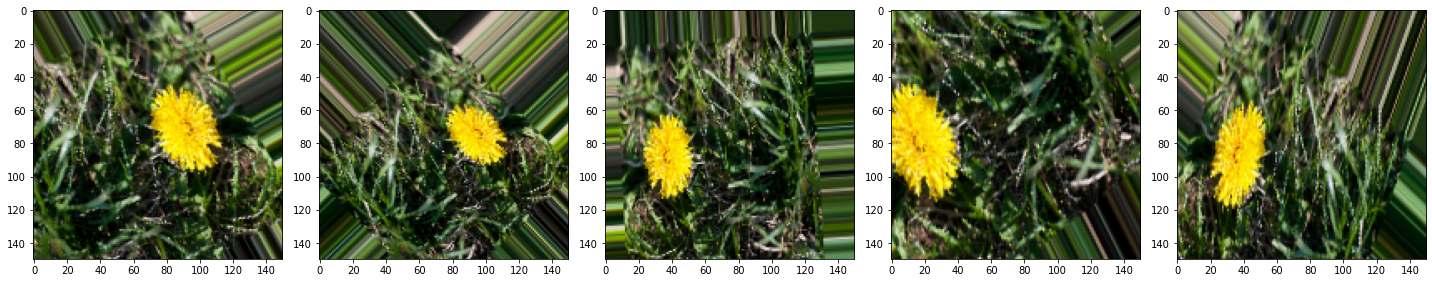

In [20]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(augmented_images)

In [21]:
val_img_gen = ImageDataGenerator(rescale=1./255)

In [22]:
val_data_gen = val_img_gen.flow_from_directory(directory=val_dir,
                                                   target_size=(IMAGE_SHAPE, IMAGE_SHAPE),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='sparse')

Found 735 images belonging to 5 classes.


# **Creating Model**

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMAGE_SHAPE, IMAGE_SHAPE, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5)
])

In [24]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [25]:
EPOCHS = 100

In [26]:
EPOCHS, BATCH_SIZE

(100, 100)

In [27]:
len(train_data_gen), train_data_gen.n

(30, 2935)

In [29]:
history = model.fit(train_data_gen,
                    epochs=EPOCHS,
                    steps_per_epoch=int(np.ceil(train_data_gen.n/BATCH_SIZE)),
                    validation_data=val_data_gen,
                    validation_steps=int(np.ceil(val_data_gen.n/BATCH_SIZE)))

Epoch 1/100
30/30 [==============================] - 56s 884ms/step - loss: 1.4219 - accuracy: 0.3843 - val_loss: 1.1713 - val_accuracy: 0.4585
Epoch 2/100
30/30 [==============================] - 26s 882ms/step - loss: 1.1481 - accuracy: 0.5230 - val_loss: 1.0670 - val_accuracy: 0.5619
Epoch 3/100
30/30 [==============================] - 27s 890ms/step - loss: 1.0591 - accuracy: 0.5704 - val_loss: 1.0693 - val_accuracy: 0.5891
Epoch 4/100
30/30 [==============================] - 26s 881ms/step - loss: 0.9971 - accuracy: 0.5963 - val_loss: 0.9200 - val_accuracy: 0.6395
Epoch 5/100
30/30 [==============================] - 27s 885ms/step - loss: 0.9565 - accuracy: 0.6123 - val_loss: 0.9382 - val_accuracy: 0.6354
Epoch 6/100
30/30 [==============================] - 27s 889ms/step - loss: 0.8931 - accuracy: 0.6542 - val_loss: 0.8626 - val_accuracy: 0.6680
Epoch 7/100
30/30 [==============================] - 27s 896ms/step - loss: 0.9165 - accuracy: 0.6426 - val_loss: 0.9355 - val_accuracy:

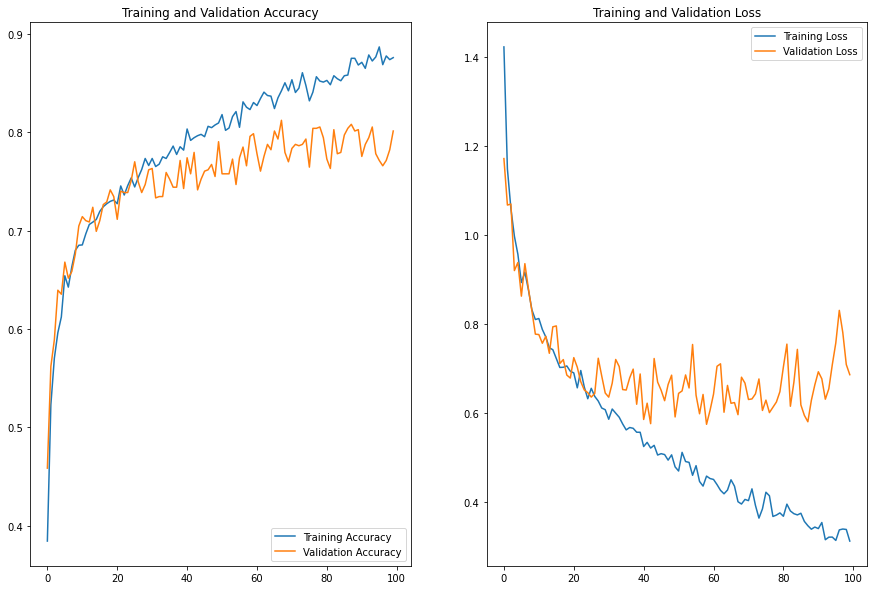

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()